# Business Case: Loantap Logistic Regression Model

## Context
LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer-friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses through 4 main financial instruments:

- Personal Loan  
- EMI Free Loan  
- Personal Overdraft  
- Advance Salary Loan  

This case study will focus on the underwriting process behind **Personal Loan** only.

### Problem Statement

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

### Data Dictionary

- **loan_amnt**: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **term**: The number of payments on the loan. Values are in months and can be either 36 or 60.
- **int_rate**: Interest Rate on the loan.
- **installment**: The monthly payment owed by the borrower if the loan originates.
- **grade**: LoanTap assigned loan grade.
- **sub_grade**: LoanTap assigned loan subgrade.
- **emp_title**: The job title supplied by the Borrower when applying for the loan.
- **emp_length**: Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years.
- **home_ownership**: The home ownership status provided by the borrower during registration or obtained from the credit report.
- **annual_inc**: The self-reported annual income provided by the borrower during registration.
- **verification_status**: Indicates if income was verified by LoanTap, not verified, or if the income source was verified.
- **issue_d**: The month which the loan was funded.
- **loan_status**: Current status of the loan - **Target Variable**.
- **purpose**: A category provided by the borrower for the loan request.
- **title**: The loan title provided by the borrower.
- **dti**: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- **earliest_cr_line**: The month the borrower's earliest reported credit line was opened.
- **open_acc**: The number of open credit lines in the borrower's credit file.
- **pub_rec**: Number of derogatory public records.
- **revol_bal**: Total credit revolving balance.
- **revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- **total_acc**: The total number of credit lines currently in the borrower's credit file.
- **initial_list_status**: The initial listing status of the loan. Possible values are – W, F.
- **application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers.
- **mort_acc**: Number of mortgage accounts.
- **pub_rec_bankruptcies**: Number of public record bankruptcies.
- **Address**: Address of the individual.

---

### Concepts Used

- Exploratory Data Analysis
- Feature Engineering
- Logistic Regression
- Precision vs Recall Tradeoff

---

### What does ‘good’ look like?

1. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
2. Check how much target variable (**loan_status**) depends on different predictor variables (Use count plots, box plots, heat maps, etc.).
3. Check correlation among independent variables and how they interact with each other.

---

### Simple Feature Engineering Steps

Example: Creation of Flags - If value greater than 1.0 then 1 else 0. This can be done on:

- `pub_rec`
- `mort_acc`
- `pub_rec_bankruptcies`

---

### Data Preprocessing

- Handle missing values and outliers
- Scaling - Using `MinMaxScaler` or `StandardScaler`

---

### Model Building

- Use **Logistic Regression** model from `sklearn` or `statsmodels` library and explain the results

---

### Model Evaluation

- Classification Report
- ROC AUC Curve
- Precision-Recall Curve

---

### Tradeoff Questions

- How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
- Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

---

### Deliverables

- Actionable insights
- Business recommendations


## Load the DataSet for DataAnalysis

In [19]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset and createing a deep copy of it
original_data = pd.read_csv("logistic_regression.csv" , index_col=None)
df= original_data.copy(deep= True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
# to see all the columns in the above dataframe we can use set option
pd.set_option("display.max_columns", None )

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Understanding the data

In [5]:
#df.shape

print("The no. of records in the dataset: ", df.shape[0])
print("The no. of features in the dataset: ", df.shape[1])

The no. of records in the dataset:  396030
The no. of features in the dataset:  27


**Working on almost 4 lac rows of user's data, and 27 columns**

In [6]:
df.info() # Basic overview of data - Nulls and object types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
#Check for duplicate values...

df.duplicated().sum()

0

In [8]:
# df.null Null values treatment
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
# calculate the percentage
null_data= original_data.isna().sum()[original_data.isna().sum() > 0]*100/original_data.shape[0]
null_data.reset_index(name= 'null_percentage')

,index,null_percentage
0,emp_title,5.789208
1,emp_length,4.621115
2,title,0.443401
3,revol_util,0.069692
4,mort_acc,9.543469
5,pub_rec_bankruptcies,0.135091


**These following columns have Null values - Now we can treat them based on what kind of data they are**
- columns with names or **`emp_title`** we can use forward fill or mode - motto is to distribute equally
- numerical features can be filled with custom value like **`pub_rec_bankruptcies`**, **`mort_acc`** as '0' OR with mean.
- first we need to fill the **`emp_length`** with values so that it should be distributed into bins. (we can fill with 0 as we can assume he is a fresher or non employer or with the mean)
- **`emp_title`**, **`title`** are titles or names - having too many unique titles (high-cardinality categorical variables)—like over 40,000 unique values in the title column—can negatively affect a logistic regression model. so we can easily drop them

## Handling Missing Values

**Ok, There are missing values in the dataset, let's see what can we do with them**

In [10]:
## features with null values

df.isna().sum()[df.isna().sum() > 0].reset_index()

,index,0
0,emp_title,22927
1,emp_length,18301
2,title,1756
3,revol_util,276
4,mort_acc,37795
5,pub_rec_bankruptcies,535


- Since we cannot build model if the dataset have N/A values - It's our first priority to deal with them.

**So, Let's deal with null one by one columns**
1. `emp_title`: it's a categorical features that has more 1.7 lac of unique values in it. Which are repeated but different format. Since it is categorical and increase the cardinality we can safely remove this column. We can perform EDA as well as there are huge number of unique titles in the dataset.
2. `emp_lenght`: emp_length tells about the years that he has been working consistently. Let's do some EDA on this later. It has 4% of null data with it. we can assume if he didn't entered the emp_lenght then he might not have enough work experience means '0' experience, Or we can do it via target achieveing.
3. `title`: This column has the same problems as emp_title, there are almost 48k unique values and high cardinality issue. Also this has multiple title that are same but written differently. It would take a lot of time to rectify all of this. even though we are not sure weather is it worth investing time or not. That's why we can drop this column as well.

In [11]:
len(df['emp_title'].unique())

173106

In [12]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [13]:
len(df['title'].unique())

48817

In [14]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [15]:
df.drop(['title', 'emp_title'], axis= 1, inplace= True)

In [16]:
df.shape

(396030, 25)

In [17]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Employment length - Feature Engineering and Null treatment**

 **`emp_lenght`** : as we discussed, we can change the emp_length null values to 0. assume that he has never went to work but before that let's do the EDA for that feature.

In [18]:
df['emp_length'].dtypes

dtype('O')

In [19]:
df['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [20]:
## null treatment since there are many null values in the feature we can assume they are fresher or unemployed - so can impute with 0.

df['emp_length']= df['emp_length'].fillna('0 years')
print (f"Total null values in the col emp_length is {df['emp_length'].isna().sum()}.")

Total null values in the col emp_length is 0.


In [21]:
plt.figure(figsize= (6, 3))
plt.title("Employment length ValueCounts")
sns.barplot(df['emp_length'].value_counts())
plt.xticks(rotation= 45)
plt.tight_layout()

**we have data till 10+ years if just take years from them it might get biased towards the 10 year and ignore if people with years more than 10**<br>
**Instead we can create bins and then do the label encoding or target encoding**

In [22]:
## categorizing emp based on their experience

def clean_emp_length(val):
    if pd.isnull(val):
        return np.nan
    if '< 1' in val: # combine < 1 with 1 to add in fresher bin
        return 1
    elif '10+' in val:
        return 10
    else:
        return int(val.strip().split()[0])
        
## emp lenght - check correlation with loanstatus as it has presence of null values

df['emp_length_clean'] = df['emp_length'].apply(clean_emp_length)

bins = [-1, 0, 1, 2, 5, 9, 10]
labels = ['Inactive', 'Fresher', 'Junior', 'Mid', 'Senior', 'Legend']

df['emp_level'] = pd.cut(df['emp_length_clean'], bins=bins, labels=labels, include_lowest=True)


df[['emp_length', 'emp_length_clean', 'emp_level']].value_counts().reset_index()

,emp_length,emp_length_clean,emp_level,count
0,10+ years,10,Legend,126041
1,2 years,2,Junior,35827
2,< 1 year,1,Fresher,31725
3,3 years,3,Mid,31665
4,5 years,5,Mid,26495
5,1 year,1,Fresher,25882
6,4 years,4,Mid,23952
7,6 years,6,Senior,20841
8,7 years,7,Senior,20819
9,8 years,8,Senior,19168


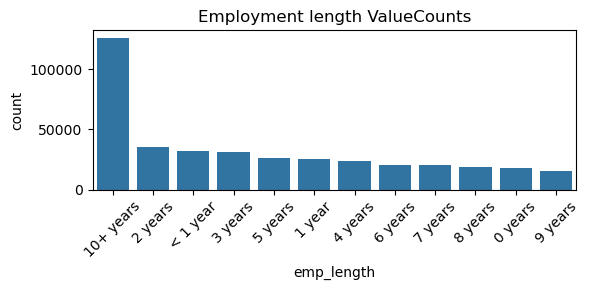

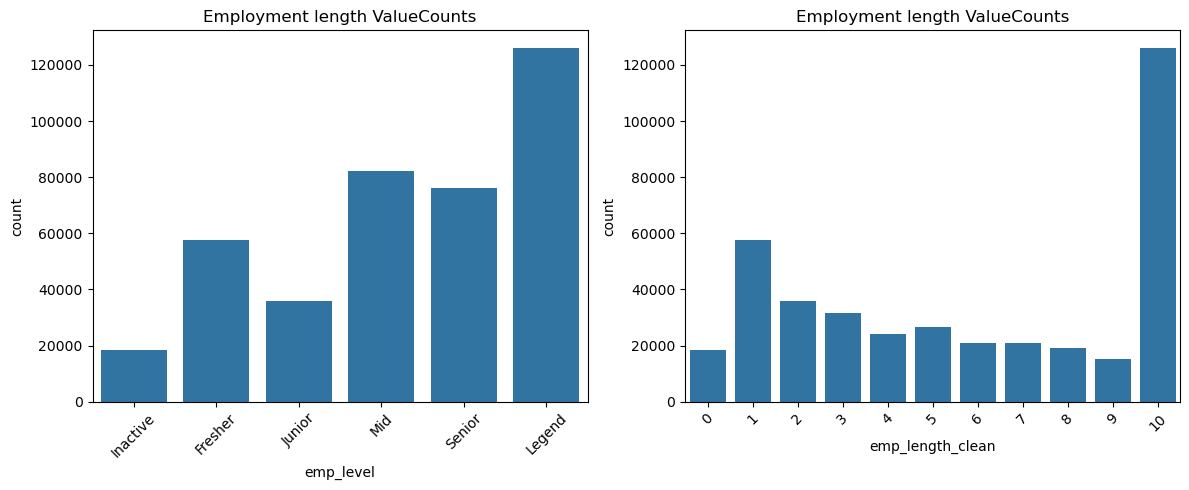

In [23]:
plt.figure(figsize= (12, 5))

plt.subplot(1, 2, 1)
plt.title("Employment length ValueCounts")
sns.barplot(df['emp_level'].value_counts())
plt.xticks(rotation= 45)

plt.subplot(1, 2, 2)
plt.title("Employment length ValueCounts")
sns.barplot(df['emp_length_clean'].value_counts())
plt.xticks(rotation= 45)

plt.tight_layout()
plt.show()

**Now we have got the almost nice distribution of data in the `emp_level` columns, we can ignore the other levels are 10 years has more bias**

In [24]:
## features with null values

df.isna().sum()[df.isna().sum() > 0].reset_index()

,index,0
0,revol_util,276
1,mort_acc,37795
2,pub_rec_bankruptcies,535


### Let's explore `mort_acc`

In [25]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

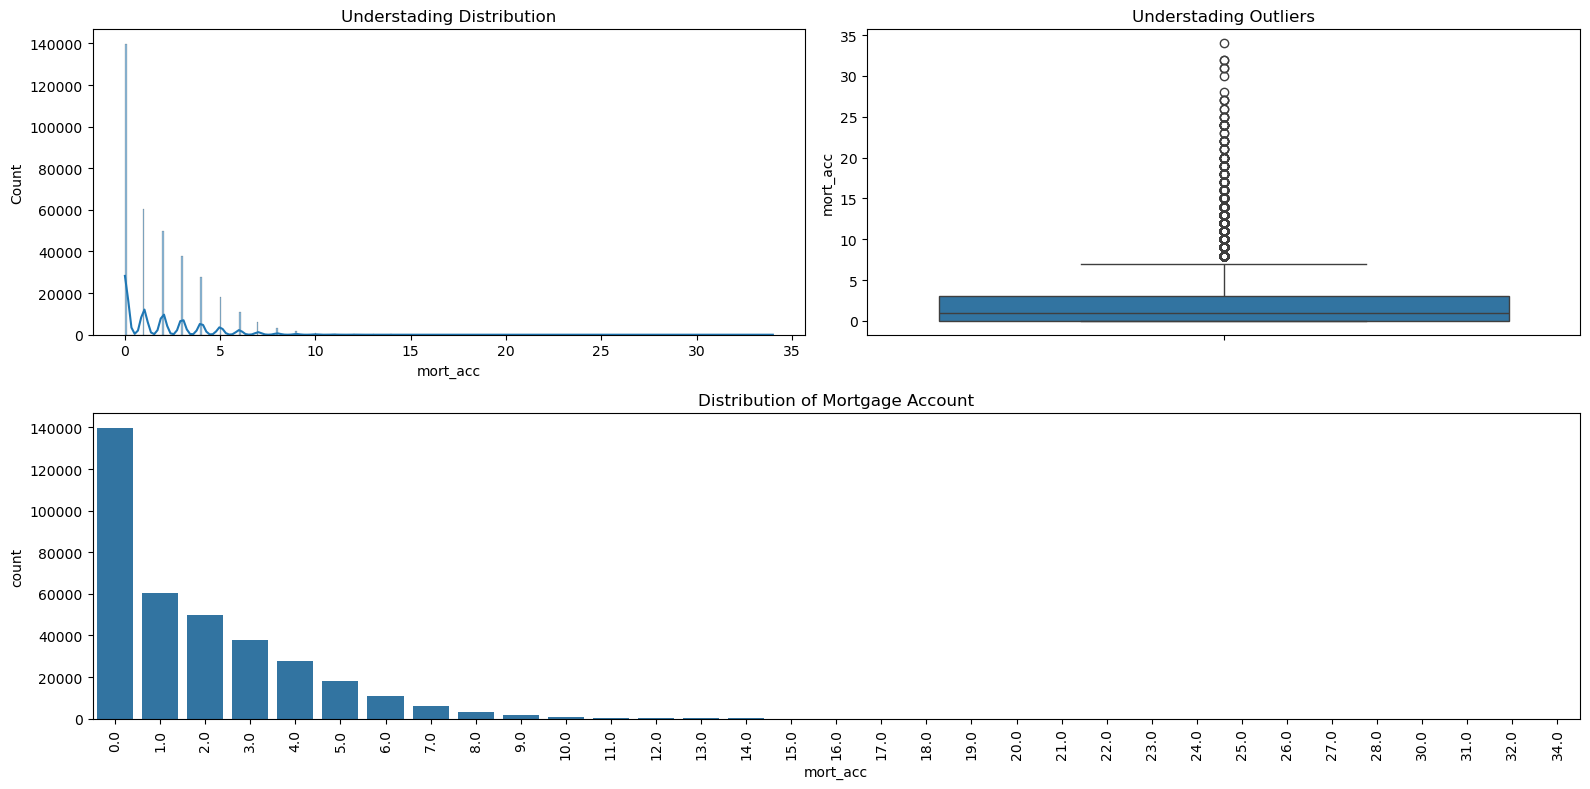

In [26]:
# let's see the distribution
plt.figure(figsize=(16, 8))

plt.subplot(2,2, 1)
sns.histplot(df['mort_acc'], kde= True)
plt.title("Understading Distribution")

plt.subplot(2, 2, 2)
sns.boxplot(df['mort_acc'])
plt.title("Understading Outliers")

plt.subplot(2, 1, 2)
sns.countplot(x='mort_acc', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Mortgage Account')

plt.tight_layout()
plt.show()

In [27]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

#### Observations
* The data is heavily right skewed which can affect the model while doing the predictions
* Obviously there are lot of outliers. A lot of people have mortgage account until 6 but then the no. of account are exponentially decreasing.
* Surprisingly the average count of mort acc are far less that is 1.82 rounded to 2 accounts for each.
* The feature is categorical since all of them distinct values, it also create a cardinality issue if combined overall.

**Solutions**:
   1. We can cap the outliers to the upper boundary this will solve the outliers problems.
   2. We have two problems here bad distributiona and outlier so what we can do is. We can convert them into binary. mort_acc > 1 = 1, else 0.\
   3. Also filling the null values with '0'. Assuming they have 0 accounts that's why they left blank also it evenly get distributed.

In [28]:
df['mort_acc'][df['mort_acc'] > 0] = 1
df['mort_acc'].value_counts()

mort_acc
1.0    218458
0.0    139777
Name: count, dtype: int64

In [29]:
# Fill the n/a values with 0 

df['mort_acc'].fillna(0, inplace= True)

print(f"There are {df['mort_acc'].isna().sum()} null values in the mort_acc series")

There are 0 null values in the mort_acc series


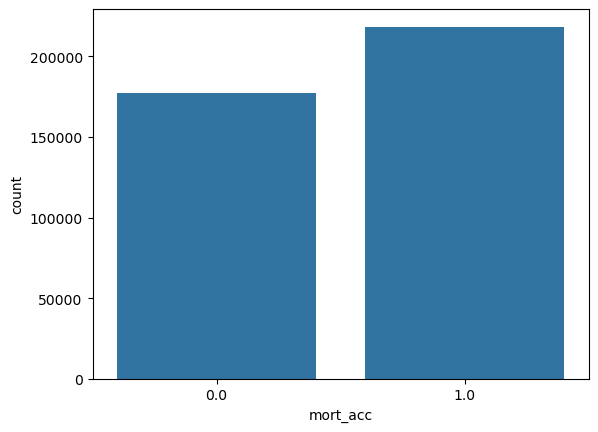

In [30]:
# df['mort_acc'].value_counts()

sns.barplot(df['mort_acc'].value_counts())
plt.show()

In [31]:
print(f"Mean of mort_acc is {df['mort_acc'].mean().round(2)}")

Mean of mort_acc is 0.55


In [32]:
df.isna().sum()[df.isna().sum() > 0].reset_index()

,index,0
0,revol_util,276
1,pub_rec_bankruptcies,535


In [33]:
## There are very few null values here we can ignore them and simple remove them so that we can invest more time in other stuff

## removing the outliers
df.dropna(axis='index', how= 'any', inplace=True)
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
emp_length_clean        0
emp_level               0
dtype: int64

## Understading the data

In [34]:
print(f"No. of records:  {df.shape[0]}, No. of features: {df.shape[1]}")
df.info()

No. of records:  395219, No. of features: 27
<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             395219 non-null  float64 
 1   term                  395219 non-null  object  
 2   int_rate              395219 non-null  float64 
 3   installment           395219 non-null  float64 
 4   grade                 395219 non-null  object  
 5   sub_grade             395219 non-null  object  
 6   emp_length            395219 non-null  object  
 7   home_ownership        395219 non-null  object  
 8   annual_inc            395219 non-null  float64 
 9   verification_status   395219 non-null  object  
 10  issue_d               395219 non-null  object  
 11  loan_status           395219 non-null  object  
 12  purpose               395219 non-null  object  
 13  dti                   395219 non-null  float64 
 

**Since we have done lot of changes like removing rows, modifying them the index have been misalligned for this we can reset_index then drop the previous one**

In [35]:
df.reset_index(drop=True, inplace= True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_length_clean,emp_level
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10,Legend
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4,Mid
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,Fresher
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",6,Senior
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",9,Senior


In [36]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,emp_length_clean
count,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000
mean,14122.061250,13.642094,432.069020,7.419937e+04,17.390758,11.318494,0.178481,1.585165e+04,53.808764,25.426505,0.552367,0.121722,5.746761
std,8357.054944,4.472944,250.700153,6.155725e+04,18.032696,5.134901,0.531098,2.058427e+04,24.440088,11.885322,0.497251,0.356273,3.659957
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.300000,8.000000,0.000000,6.038000e+03,35.900000,17.000000,0.000000,0.000000,2.000000
50%,12000.000000,13.330000,375.490000,6.400000e+04,16.920000,10.000000,0.000000,1.119000e+04,54.800000,24.000000,1.000000,0.000000,6.000000
75%,20000.000000,16.550000,567.790000,9.000000e+04,22.990000,14.000000,0.000000,1.962600e+04,72.900000,32.000000,1.000000,0.000000,10.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,1.000000,8.000000,10.000000


In [37]:
df.describe(include=['object', 'category'])

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address,emp_level
count,395219,395219,395219,395219,395219,395219,395219,395219,395219,395219,395219,395219,395219,395219
unique,2,7,35,12,6,3,112,2,14,684,2,3,392898,6
top,36 months,B,B3,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466,Legend
freq,301247,115812,26611,125876,198022,139451,14838,317696,234169,3013,237346,394508,8,125876


In [38]:
def column_summary(data, col, uni_len=13):
    """
    Column Summarizer Utility
    
    Displays key statistics for column in the DataFrame:
    - Column name and data type
    - Null value count and percentage
    - Number of unique values
    - Value counts (if column is categorical or has unique values <= uni_lens)
    - Descriptive statistics for numerical columns
    
    Parameters:
    - data: Pandas DataFrame
    - col: Column name (string)
    - uni_lens: Threshold for displaying value counts (int)
    """
    
    print("--" * 40)
    print(f"🔹 Column Name       : {col}")
    print(f"🔸 Data Type         : {data[col].dtype}")
    
    total_null = data[col].isnull().sum()
    null_percent = (total_null / len(data)) * 100
    print(f"❌ Total Null Values : {total_null} ({null_percent:.2f}%)")
    
    unique_vals = data[col].nunique()
    print(f"🔢 Unique Values     : {unique_vals}")
    
    # Display unique values and value counts if categorical or low cardinality
    if data[col].dtype in ('object', 'category') and unique_vals < uni_len:
        print(f"\n📊 Value Counts:\n{data[col].value_counts(dropna=False)}")
        
    
    print("--" * 40 + "\n")

# Apply it to all columns
for col in df.columns:
    column_summary(df, col, uni_len=10)


--------------------------------------------------------------------------------
🔹 Column Name       : loan_amnt
🔸 Data Type         : float64
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 1392
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
🔹 Column Name       : term
🔸 Data Type         : object
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 2

📊 Value Counts:
term
36 months    301247
60 months     93972
Name: count, dtype: int64
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
🔹 Column Name       : int_rate
🔸 Data Type         : float64
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 532
--------------------------------------------------------------------------------

-----------------------------------------------------------------------

## Exploratory Data Analysis - Understanding the data in Business Perspective

In [39]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_length_clean,emp_level
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10,Legend
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4,Mid
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,Fresher
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",6,Senior
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",9,Senior


In [40]:
target_var = df['loan_status']

In [41]:
print(target_var.value_counts())

# sns.barplot(y= target_var, orient='h')

loan_status
Fully Paid     317696
Charged Off     77523
Name: count, dtype: int64


**dataset is imbalanced more on this later**

### Univariate Analysis - Check data distribution and outliers for each feature.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             395219 non-null  float64 
 1   term                  395219 non-null  object  
 2   int_rate              395219 non-null  float64 
 3   installment           395219 non-null  float64 
 4   grade                 395219 non-null  object  
 5   sub_grade             395219 non-null  object  
 6   emp_length            395219 non-null  object  
 7   home_ownership        395219 non-null  object  
 8   annual_inc            395219 non-null  float64 
 9   verification_status   395219 non-null  object  
 10  issue_d               395219 non-null  object  
 11  loan_status           395219 non-null  object  
 12  purpose               395219 non-null  object  
 13  dti                   395219 non-null  float64 
 14  earliest_cr_line      395219 non-nul

In [43]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'emp_length_clean', 'emp_level'],
      dtype='object')

In [44]:
print(column_summary(df, col='dti'))
print(df['dti'].describe())

--------------------------------------------------------------------------------
🔹 Column Name       : dti
🔸 Data Type         : float64
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 4262
--------------------------------------------------------------------------------

None
count    395219.000000
mean         17.390758
std          18.032696
min           0.000000
25%          11.300000
50%          16.920000
75%          22.990000
max        9999.000000
Name: dti, dtype: float64


In [45]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'emp_length_clean', 'emp_level'],
      dtype='object')

In [46]:
numerical_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies']

In [47]:
df[numerical_cols].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,395219.000000
mean,14122.061250,13.642094,432.069020,7.419937e+04,17.390758,11.318494,0.178481,1.585165e+04,53.808764,25.426505,0.121722
std,8357.054944,4.472944,250.700153,6.155725e+04,18.032696,5.134901,0.531098,2.058427e+04,24.440088,11.885322,0.356273
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.300000,8.000000,0.000000,6.038000e+03,35.900000,17.000000,0.000000
50%,12000.000000,13.330000,375.490000,6.400000e+04,16.920000,10.000000,0.000000,1.119000e+04,54.800000,24.000000,0.000000
75%,20000.000000,16.550000,567.790000,9.000000e+04,22.990000,14.000000,0.000000,1.962600e+04,72.900000,32.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,8.000000


In [48]:
def hist_box_plot(data, cols):
    colors = sns.color_palette("Set2", len(cols))
    n = len(cols)
    plt.figure(figsize=(15, 5*n))
    # if there are three numerical columns, total 6 positions
   
    for i, col in enumerate(cols):
        plt.subplot(n, 2, 2 * i + 1)
        sns.histplot(data[col], kde=True, bins=30, color=colors[i])
        plt.title(f"Histogram & KDE of {col}")
    
        plt.subplot(n, 2, 2 * i + 2)
        sns.boxplot(x=data[col], color=colors[i])
        plt.title(f"Box Plot of {col}")
    
    plt.tight_layout()
    plt.show()

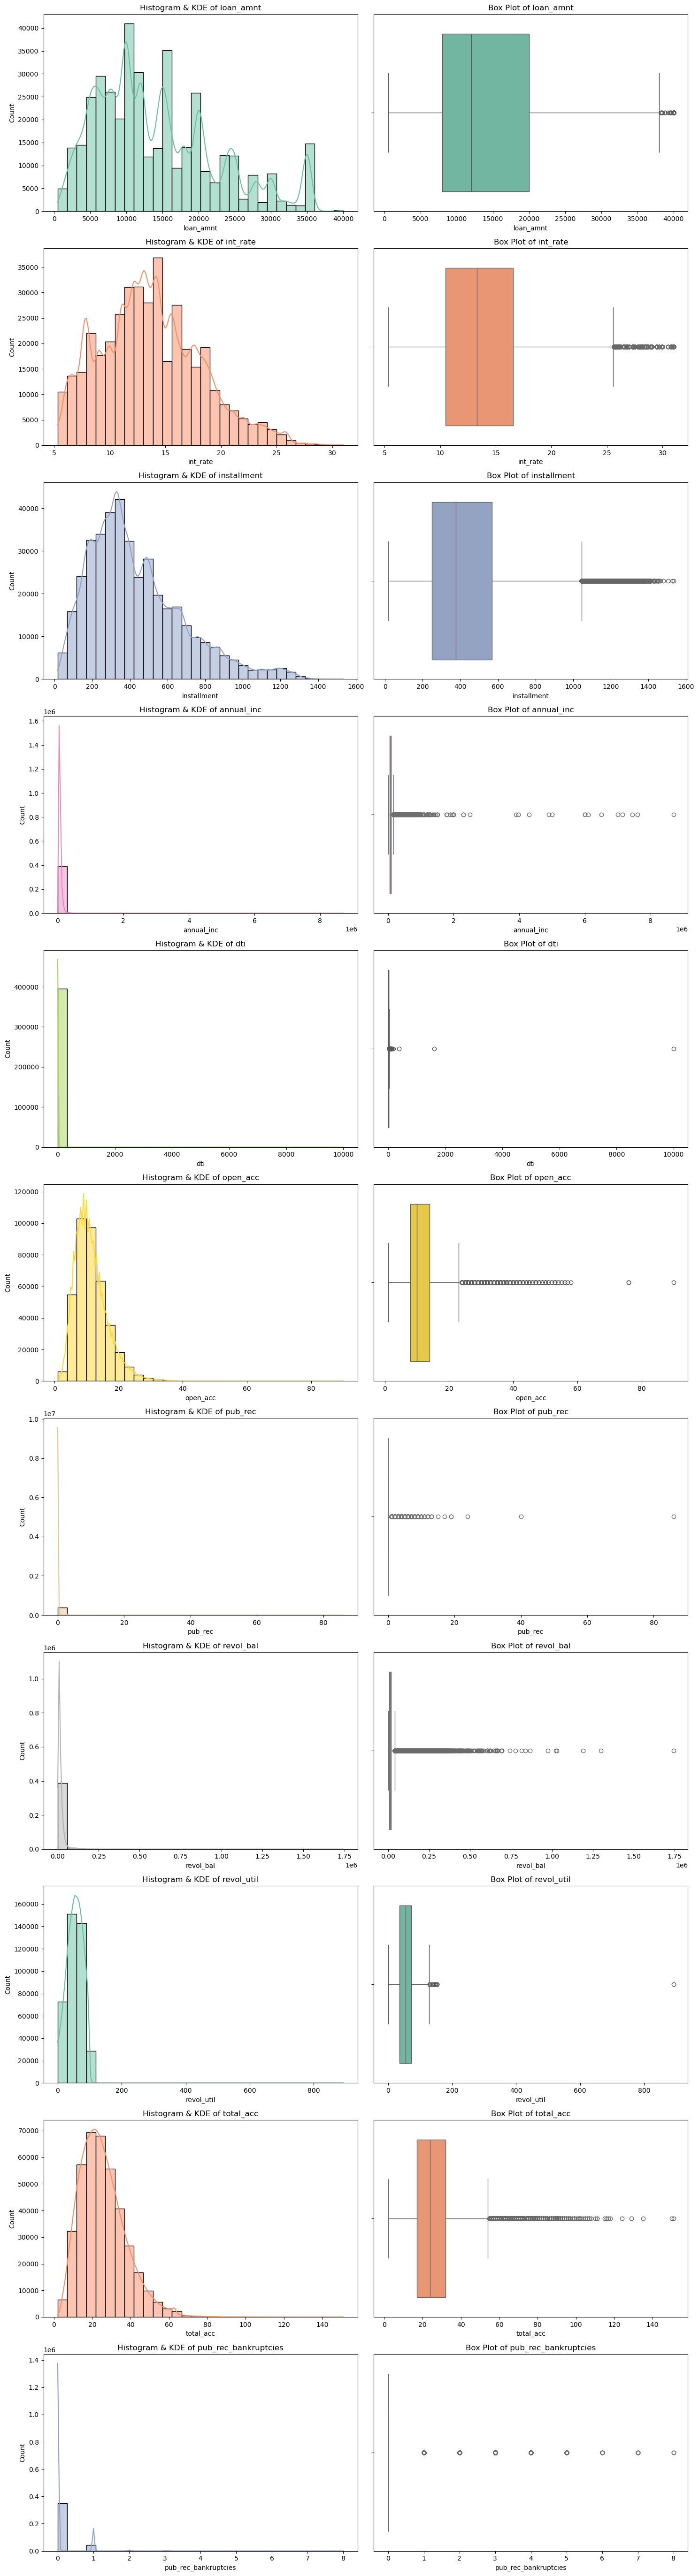

In [49]:
hist_box_plot(df, numerical_cols)

**There are many numerical features with outliers and data that is skewed because of outliers other wise they are Normally distributed**<br>
**But we cannot remove them as they are valuable features we need the person with highest salaries, interest rates, salary etc**

**Converts few discrete and account realted to binary features to reduce cardinality and for managing the outliers and distribution**

In [50]:
binary_cols= ['pub_rec_bankruptcies', 'pub_rec', 'mort_acc']

for col in binary_cols:
    df[col][df[col] > 0] = 1

In [51]:
df[binary_cols].value_counts()

pub_rec_bankruptcies  pub_rec  mort_acc
0.0                   0.0      1.0         181236
                               0.0         156253
1.0                   1.0      1.0          29603
                               0.0          15508
0.0                   1.0      1.0           7467
                               0.0           5152
Name: count, dtype: int64

In [52]:
# open accounts
df['open_acc']= original_data['open_acc']

In [53]:
df['open_acc'].describe()

count    395219.000000
mean         11.310944
std           5.137241
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

**There are average of 11 bank accounts for each person, mean and median are almost same so outliers is not much effected here.**

In [54]:
# univariate analysis on categorical columns

cat_cols = [col for col in df.columns if df[col].nunique() <= 14]
cat_cols

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'emp_length_clean',
 'emp_level']

In [55]:
cat_cols= ['term',  'grade',  'home_ownership',  'verification_status',  
           'loan_status',  'purpose',  'initial_list_status',  
           'application_type',  'mort_acc',  'emp_level']

In [56]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77523.0,15132.578074,8503.989092,1000.0,8575.0,14000.0,20000.0,40000.0
Fully Paid,317696.0,13875.478681,8302.172723,500.0,7500.0,12000.0,19275.0,40000.0


* **Individual whose loan amnt is low is very likely to pay full amount, the mean of loan amount that has been fully paid is `$13876`**
* **High loan amount is very unlikely to pay full amount and the mean of that loan amount is `$15133`**

### Little of Data Engineering

In [57]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [58]:
# convert the none and any named rows to others as such they don't have much meaning

df['home_ownership']= df['home_ownership'].replace({'NONE': 'OTHER',
                                                    'ANY' : 'OTHER' })
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [59]:
# verification status

df['verification_status'].value_counts()

verification_status
Verified           139451
Source Verified    131301
Not Verified       124467
Name: count, dtype: int64

In [60]:
# can combine verified and source verified (need more insights on this)

In [61]:
# let's explore purpose columns

print(" Unique field in the purpose columns: ", df['purpose'].nunique())

 Unique field in the purpose columns:  14


In [62]:
df['purpose'].nunique()

14

In [63]:
df['purpose'].value_counts()

purpose
debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: count, dtype: int64

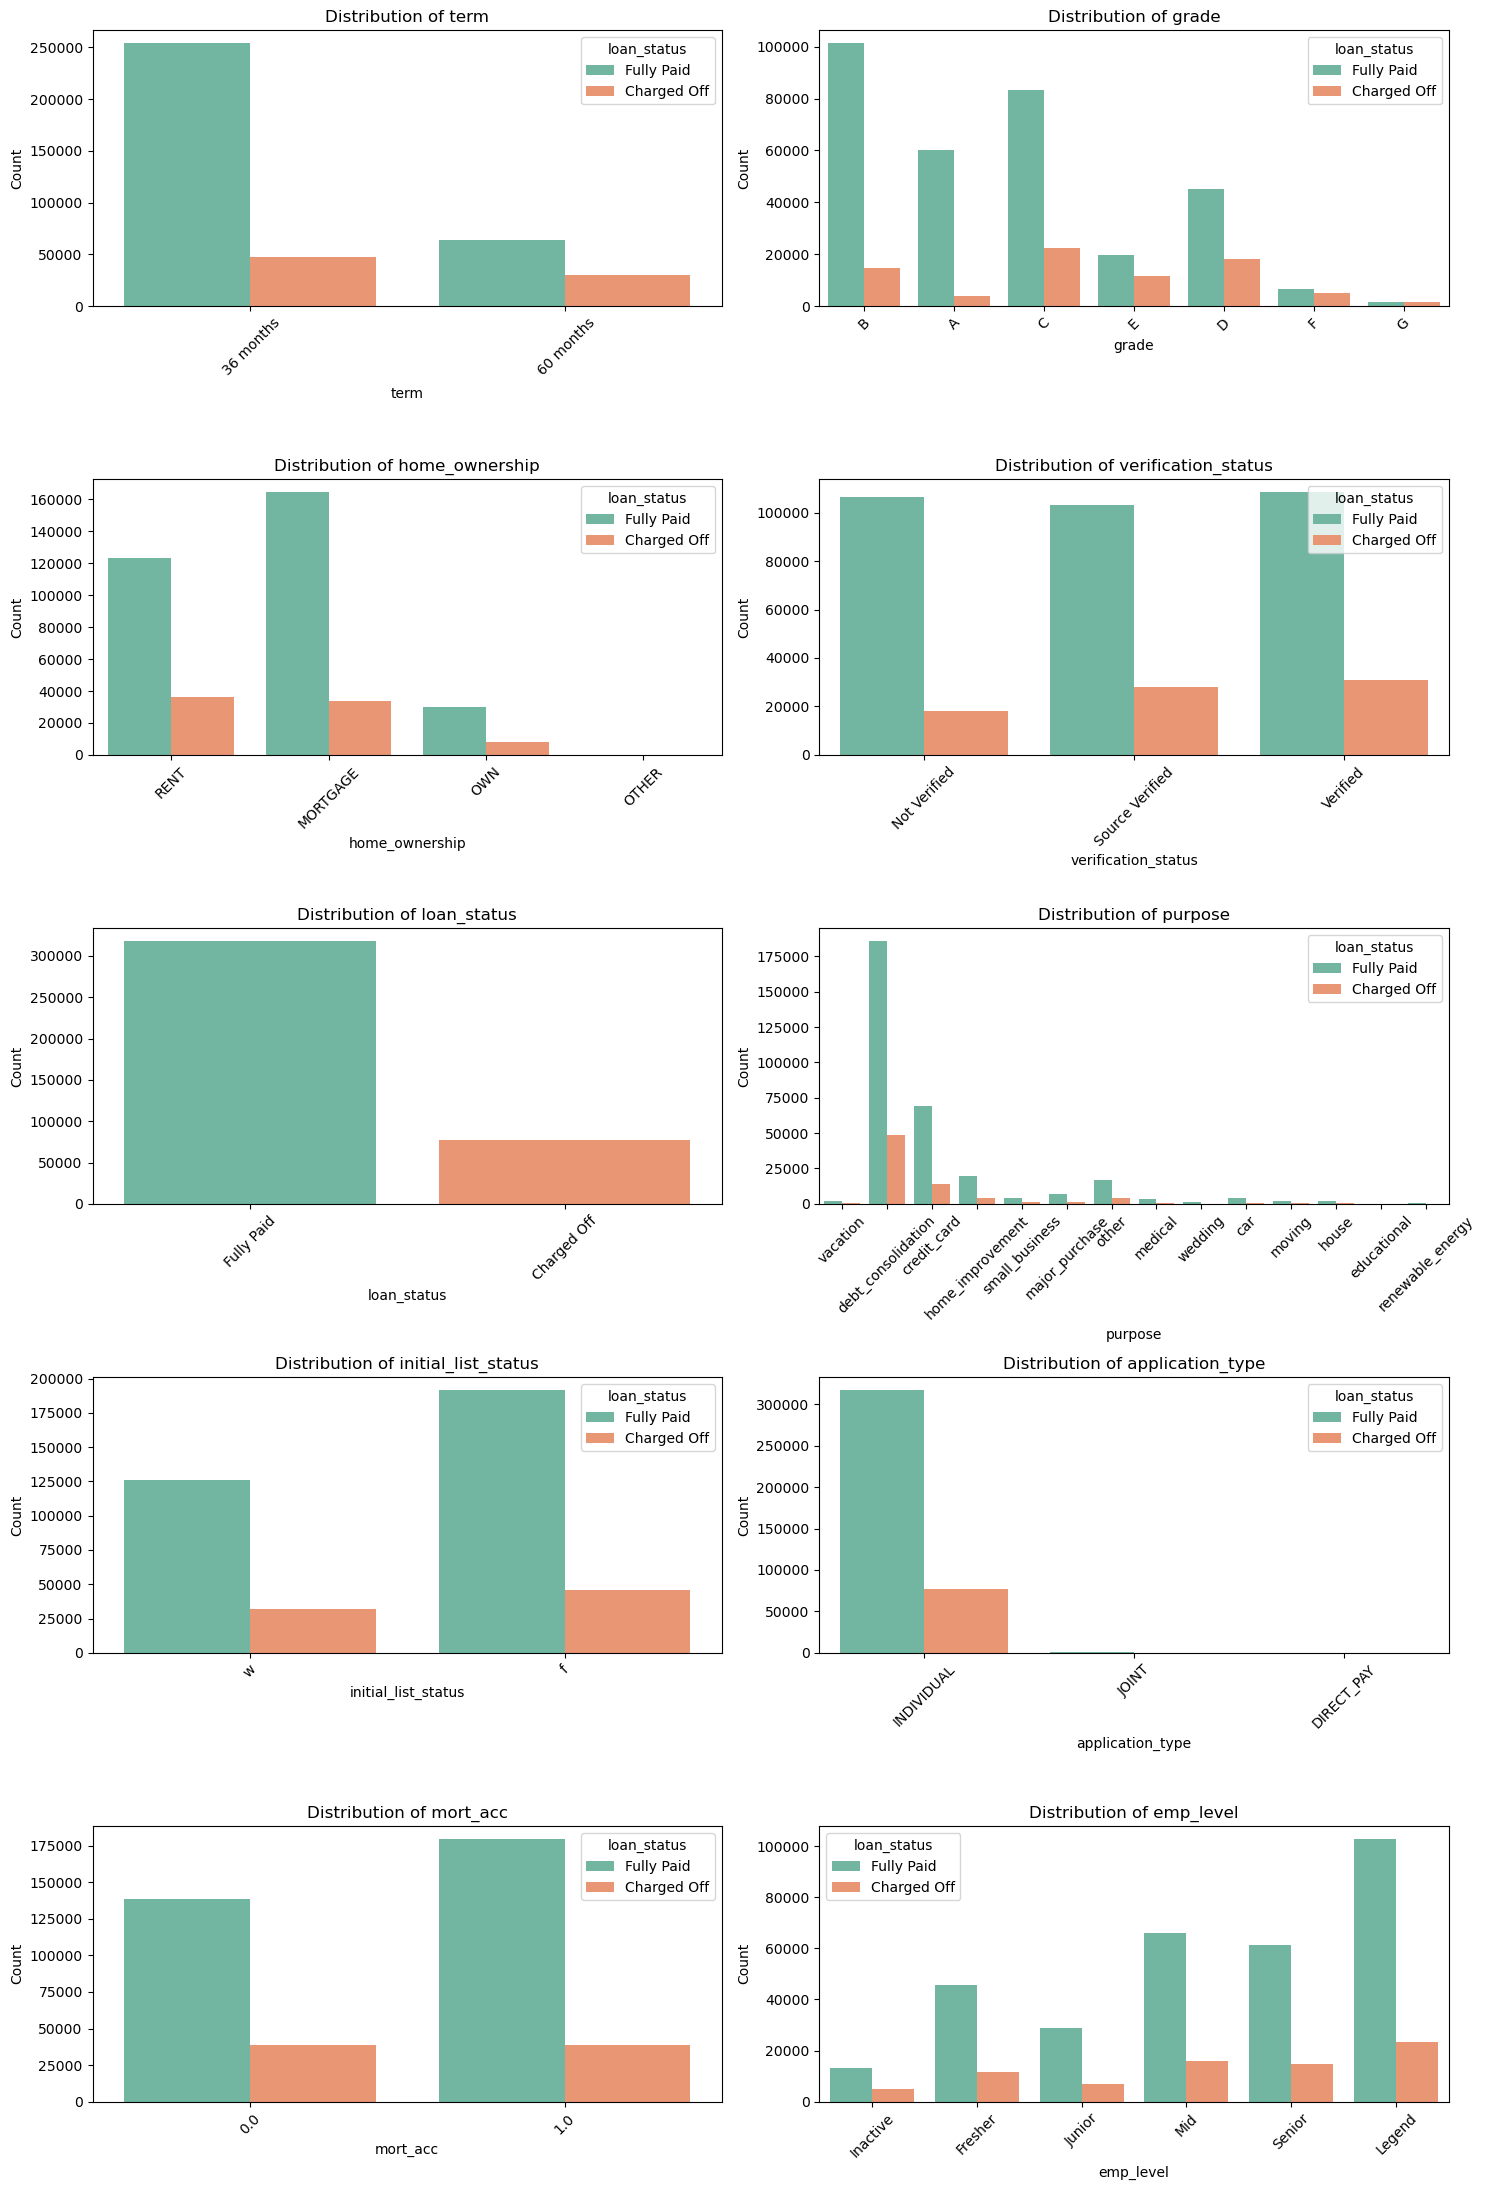

In [64]:
plt.figure(figsize=(15, 22))
# for categorical data for 10 cols
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)  # 2x2 grid of subplots
    sns.countplot(x=df[col], palette="Set2", hue= df['loan_status'])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation= 45)
    plt.xlabel(col)
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

#### Observations: 
1. `term`: Loan with less team period that is 36 months likely to pay full loan than the longer terms. And also application for 36 months is higher which is a good sign. Longerterm period are less likely to pay full amount.
2. Grage A, B have good fully paid to charged off ratio than other grade. Ratio decreases as the grade increases,Thus grade is a valueable feature we can say.
3. **More applications are for mortgage loans**. And also these are more likely to pay full loan as the ratio is very less followed by own and rent. **Targeting these customers could improve the business**
4. majority of the loans are took for debt consolidation and credit card.followed by home improvements and major purchase.
5. Joint and direct_pay applications are very few, we can ignore this columns, as the 90% percent of the applications are Individual type.

In [65]:
grades= df['grade'].value_counts().reset_index().sort_values('grade', ignore_index=True)
subgrades= df['sub_grade'].value_counts().reset_index().sort_values('sub_grade', ignore_index= True)

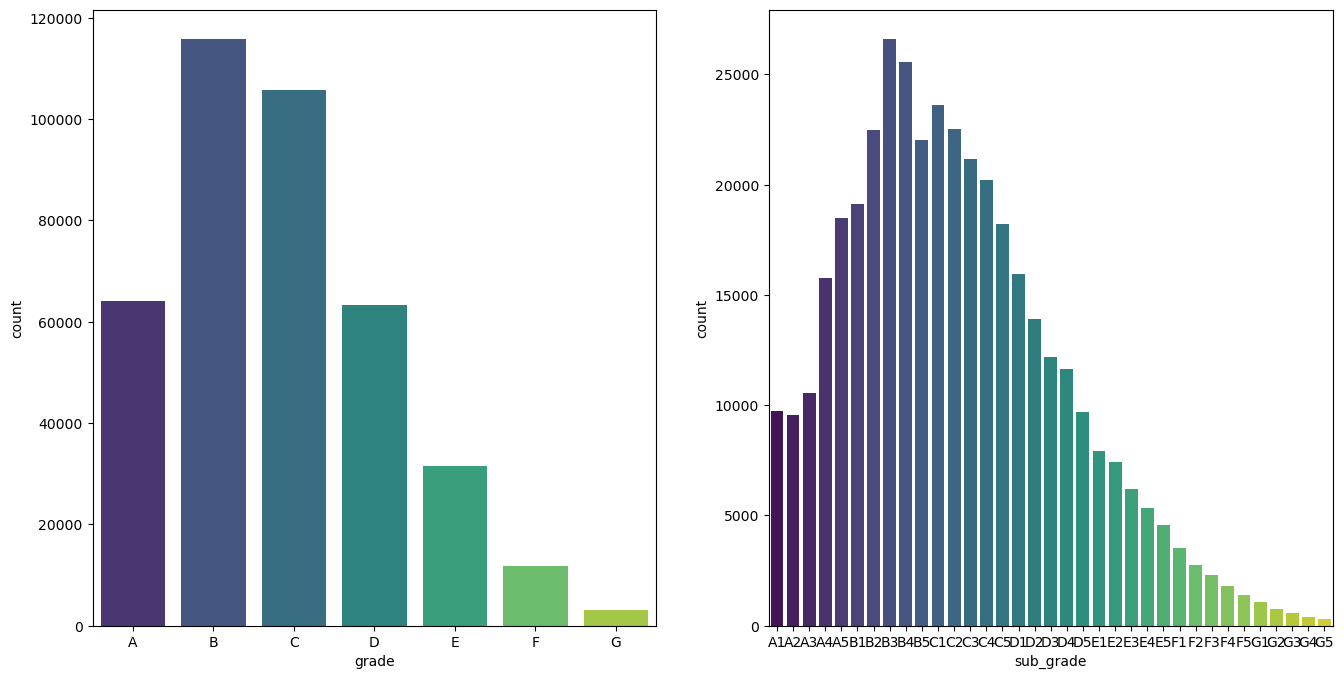

In [66]:


plt.figure(figsize= (16, 8))

plt.subplot(1, 2, 1)
sns.barplot(data=grades, x='grade', y='count', palette='viridis')

plt.subplot(1, 2, 2)
sns.barplot(data= subgrades, x= 'sub_grade', y= 'count', palette= 'viridis')

plt.tight_layout
plt.show()


**Grades and SubGrade have almost the similar graph highs at B grades and decreasing further, We can remove sub_grade feature here as they show the same or similar observations**

In [67]:
# dropped the sub_grade column

df.drop('sub_grade', axis= 1, inplace= True)

In [68]:
# Getting insights from address column
df['address'].nunique()

392898

In [69]:
df['zip_code']= df['address'].str[-6:].str.strip()
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [70]:
# Mapping ZIP to State
zip_to_state = {
    '70466' : 'Louisiana',
    '22690': 'Virginia',
    '30723': 'Georgia',
    '48052': 'Michigan',
    '00813': 'U.S. Virgin Islands',
    '29597': 'South Carolina',
    '05113': 'Vermont',
    '11650': 'New York',
    '93700': 'California',
    '86630': 'Arizona'
}

df['state']= df['zip_code'].map(zip_to_state)
df_state= df['state'].value_counts().reset_index()
df_state

,state,count
0,Louisiana,56880
1,Virginia,56413
2,Georgia,56402
3,Michigan,55811
4,U.S. Virgin Islands,45725
5,South Carolina,45393
6,Vermont,45300
7,New York,11210
8,California,11126
9,Arizona,10959


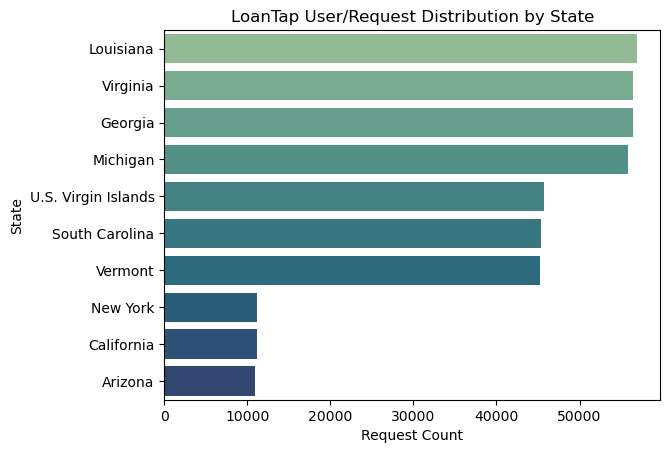

In [71]:
plt.figure()

sns.barplot(data=df_state.sort_values('count', ascending=False), x='count', y='state', palette='crest')
plt.title("LoanTap User/Request Distribution by State")
plt.xlabel("Request Count")
plt.ylabel("State")

plt.show()


In [72]:

df.groupby('loan_status')['state'].describe(include='all')

,count,unique,top,freq
loan_status,,,,
Charged Off,77523,7,New York,11210
Fully Paid,317696,7,Louisiana,45752


#### Observations
1. Louisiana has the more number of applications followed by virginia, Georgia and Michingan. where as least number for applications are from Arizona.
2. New York people are less likely to pay the loan - Interesting.... Where as Louisiana has very high probability of paying the Loan.

In [73]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_length_clean,emp_level,zip_code,state
0,10000.0,36 months,11.44,329.48,B,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10,Legend,22690,Virginia
1,8000.0,36 months,11.99,265.68,B,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4,Mid,05113,Vermont
2,15600.0,36 months,10.49,506.97,B,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,Fresher,05113,Vermont
3,7200.0,36 months,6.49,220.65,A,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",6,Senior,00813,U.S. Virgin Islands
4,24375.0,60 months,17.27,609.33,C,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",9,Senior,11650,New York


### Time series analysis

In [74]:
# convert the datetime features into datetime types

df['issue_d']= pd.to_datetime(df['issue_d'])
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])
df[['issue_d', 'earliest_cr_line']].dtypes

issue_d             datetime64[ns]
earliest_cr_line    datetime64[ns]
dtype: object

In [75]:
df[['issue_d', 'earliest_cr_line']].head()

,issue_d,earliest_cr_line
0,2015-01-01,1990-06-01
1,2015-01-01,2004-07-01
2,2015-01-01,2007-08-01
3,2014-11-01,2006-09-01
4,2013-04-01,1999-03-01


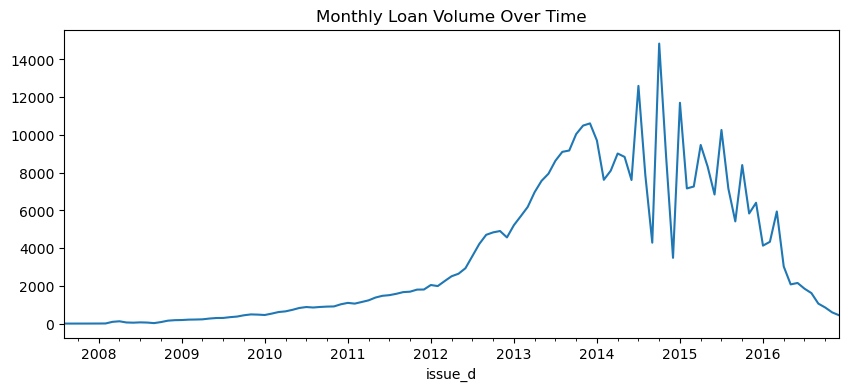

In [76]:
# Monthly loan count
monthly_loan_volume = df.set_index('issue_d').resample('M').size()

monthly_loan_volume.plot(title='Monthly Loan Volume Over Time', figsize=(10, 4))
plt.show()

#### Observations

- Loan issuance steadily increased from 2008 to late 2013, indicating strong business growth.
- Sharp spikes and drops during 2014–2015 suggest possible operational or market disruptions.
- A noticeable decline after 2015 may reflect strategic shifts, tightening credit policies, or data coverage ending.


In [77]:
df['credit_tenure_years'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 365

df['credit_tenure_years'].describe()

count    395219.000000
mean         15.769821
std           7.205981
min           3.000000
25%          10.926027
50%          14.345205
75%          19.347945
max          70.210959
Name: credit_tenure_years, dtype: float64

In [78]:
df.groupby('loan_status')['credit_tenure_years'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77523.0,15.375812,7.244707,3.0,10.589041,13.928767,18.764384,70.210959
Fully Paid,317696.0,15.865966,7.193236,3.0,11.008219,14.504110,19.509589,66.131507


**Credit age before initiating loan tells the how long the user is using credit card. As per the statistical summary there very slight difference among them - Not much of a usefull feature.**

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             395219 non-null  float64       
 1   term                  395219 non-null  object        
 2   int_rate              395219 non-null  float64       
 3   installment           395219 non-null  float64       
 4   grade                 395219 non-null  object        
 5   emp_length            395219 non-null  object        
 6   home_ownership        395219 non-null  object        
 7   annual_inc            395219 non-null  float64       
 8   verification_status   395219 non-null  object        
 9   issue_d               395219 non-null  datetime64[ns]
 10  loan_status           395219 non-null  object        
 11  purpose               395219 non-null  object        
 12  dti                   395219 non-null  float64       
 13 

### Multivariate Analysis

In [80]:
# but before that let's remove the unnecessary columns or keep cols that are good for multivariate

print(df.shape)

(395219, 29)


In [81]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_length_clean,emp_level,zip_code,state,credit_tenure_years
0,10000.0,36 months,11.44,329.48,B,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10,Legend,22690,Virginia,24.602740
1,8000.0,36 months,11.99,265.68,B,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4,Mid,05113,Vermont,10.509589
2,15600.0,36 months,10.49,506.97,B,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,Fresher,05113,Vermont,7.424658
3,7200.0,36 months,6.49,220.65,A,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",6,Senior,00813,U.S. Virgin Islands,8.172603
4,24375.0,60 months,17.27,609.33,C,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",9,Senior,11650,New York,14.095890


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             395219 non-null  float64       
 1   term                  395219 non-null  object        
 2   int_rate              395219 non-null  float64       
 3   installment           395219 non-null  float64       
 4   grade                 395219 non-null  object        
 5   emp_length            395219 non-null  object        
 6   home_ownership        395219 non-null  object        
 7   annual_inc            395219 non-null  float64       
 8   verification_status   395219 non-null  object        
 9   issue_d               395219 non-null  datetime64[ns]
 10  loan_status           395219 non-null  object        
 11  purpose               395219 non-null  object        
 12  dti                   395219 non-null  float64       
 13 

In [83]:
df_corr= df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'credit_tenure_years']]
df_corr.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,credit_tenure_years
loan_amnt,1.000000,0.168599,0.953872,0.337364,0.016338,0.328515,0.099581,0.170002
int_rate,0.168599,1.000000,0.162442,-0.057035,0.078758,-0.011290,0.293195,-0.098534
installment,0.953872,0.162442,1.000000,0.330855,0.015511,0.316664,0.123635,0.152390
annual_inc,0.337364,-0.057035,0.330855,1.000000,-0.081730,0.299758,0.027920,0.151144
dti,0.016338,0.078758,0.015511,-0.081730,1.000000,0.063461,0.088023,0.024547
revol_bal,0.328515,-0.011290,0.316664,0.299758,0.063461,1.000000,0.226305,0.206591
revol_util,0.099581,0.293195,0.123635,0.027920,0.088023,0.226305,1.000000,-0.003942
credit_tenure_years,0.170002,-0.098534,0.152390,0.151144,0.024547,0.206591,-0.003942,1.000000


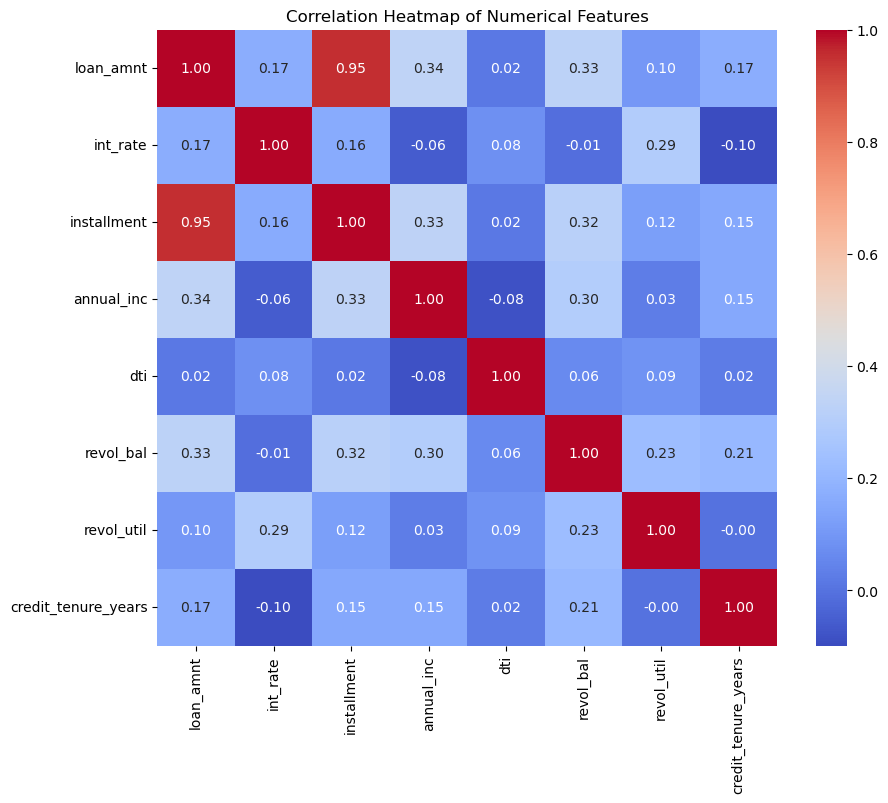

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


**installetment and loan_amnt has high correlation among them, which we can drop later as such it doesn't add new value to the data**

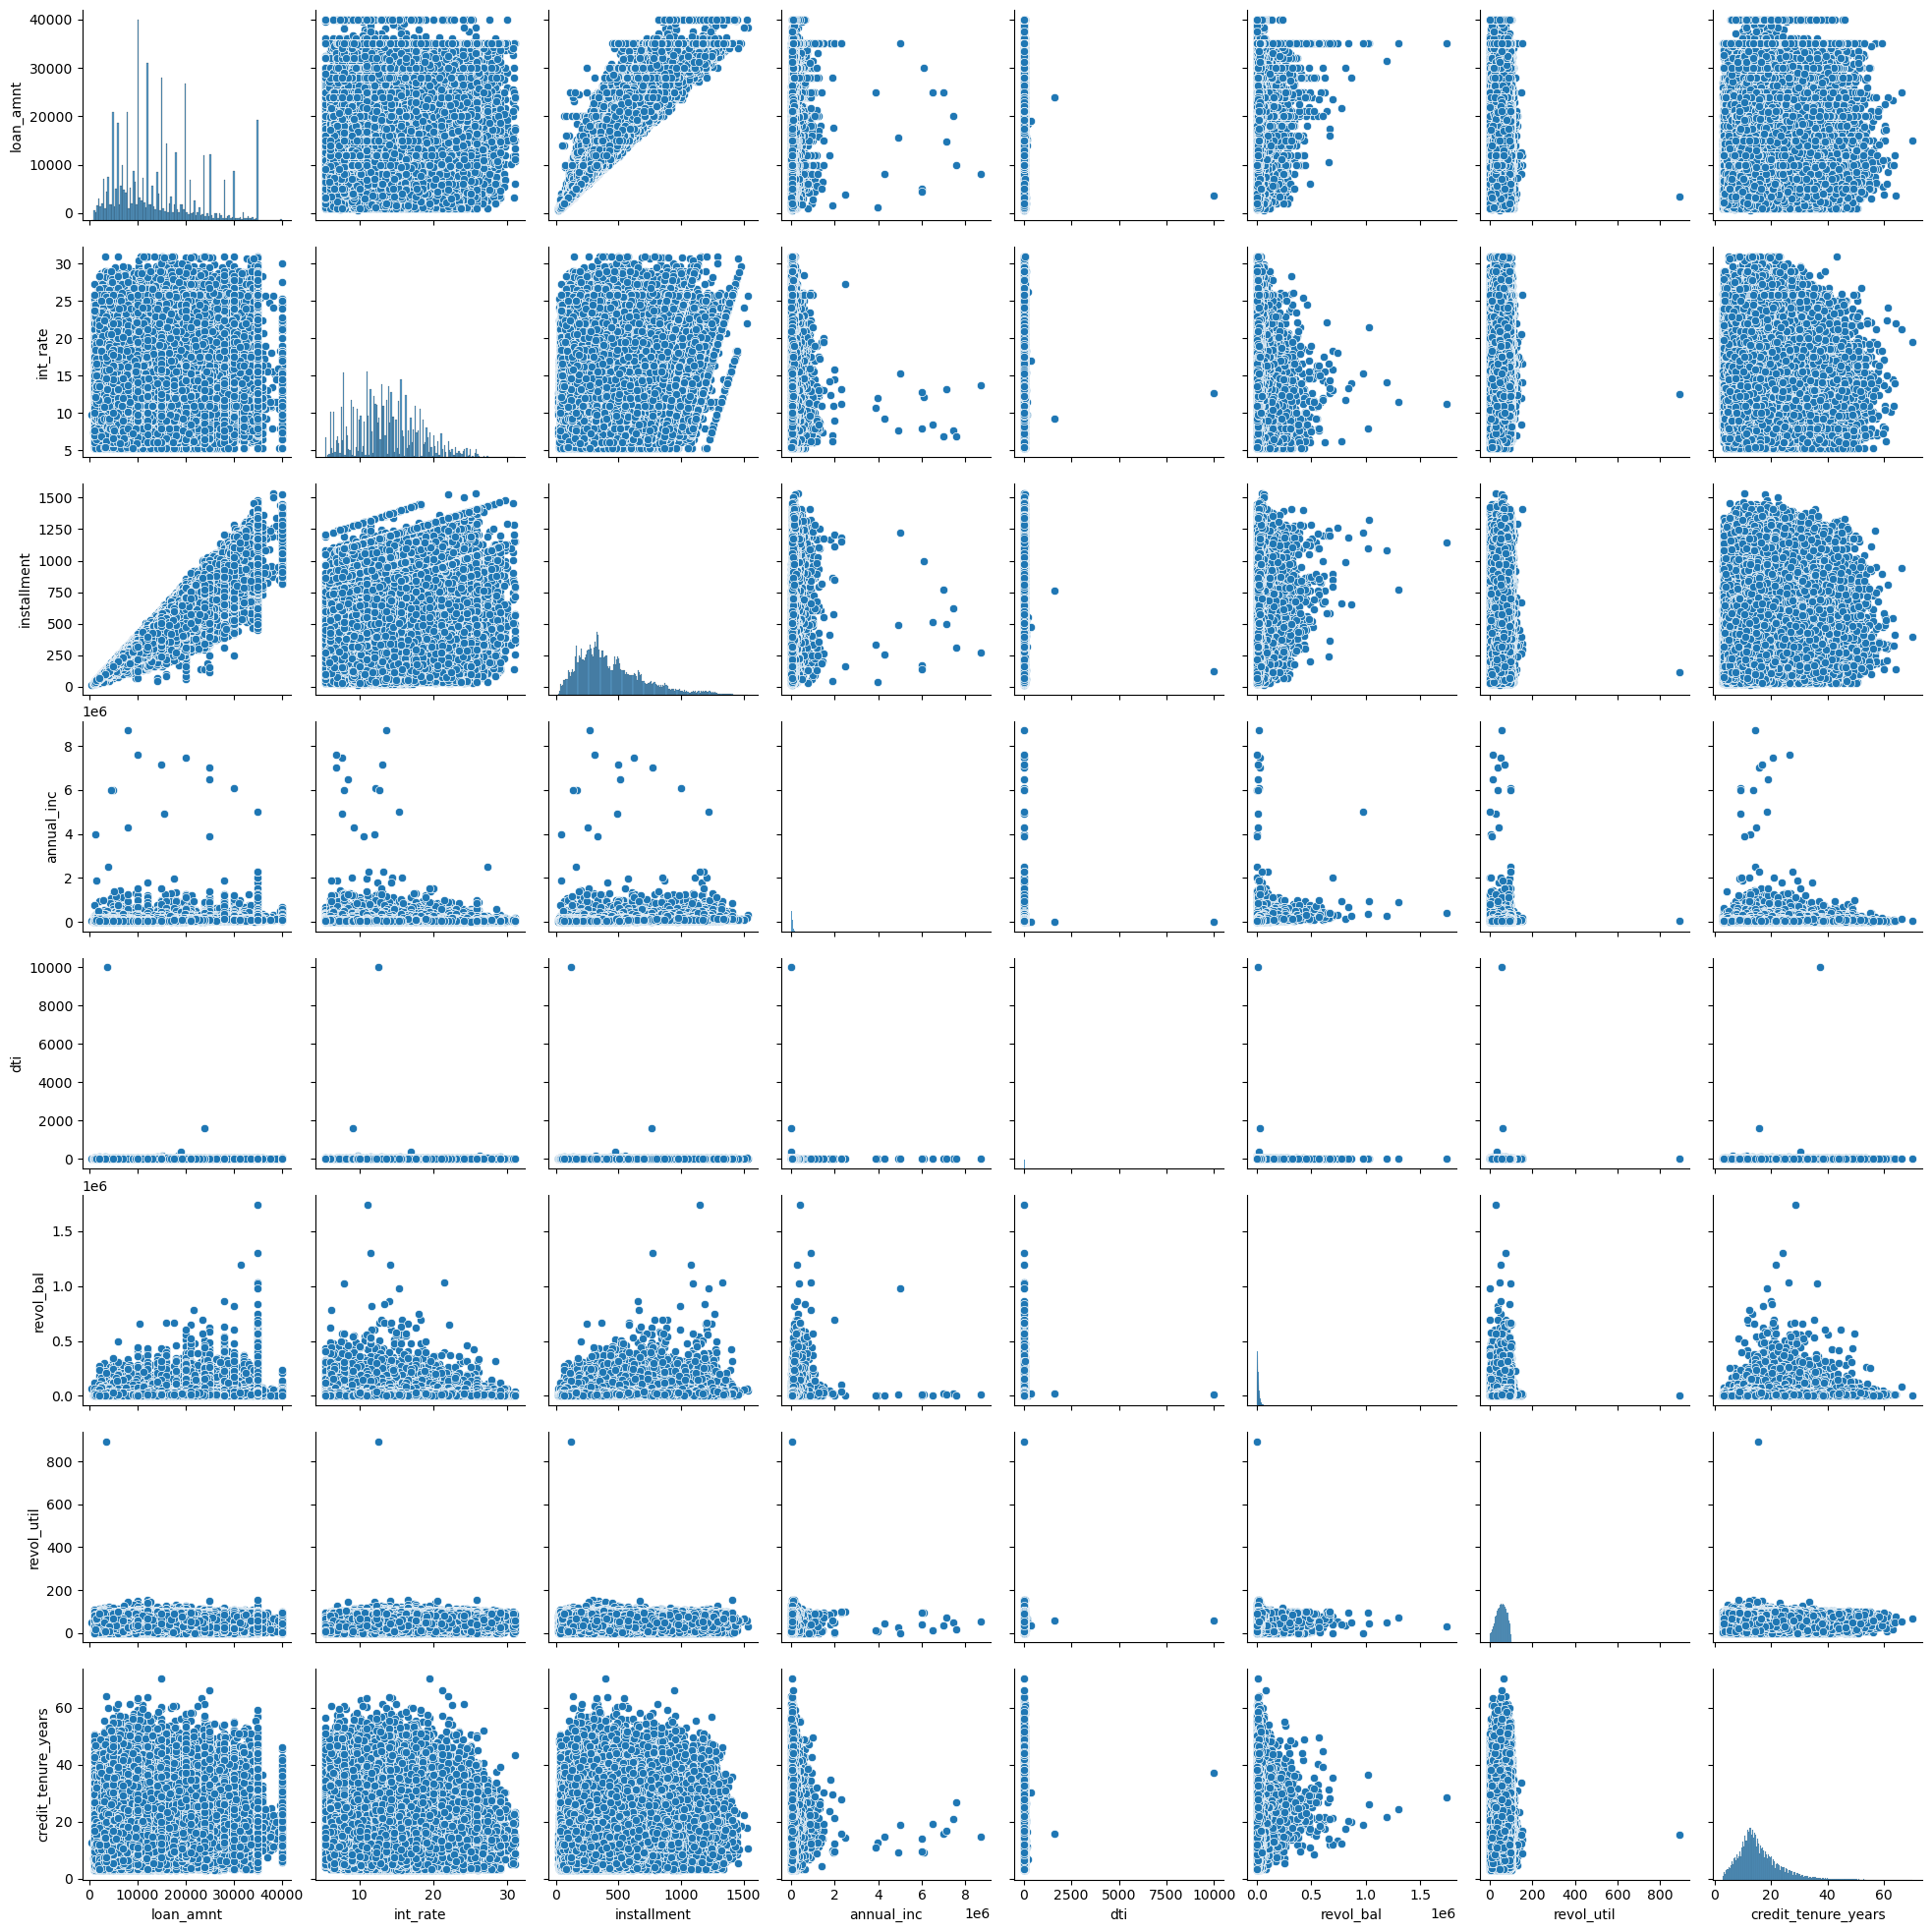

In [85]:

sns.pairplot(df_corr)
plt.show()

## Feature Engineering and Data preprocessing.

#### Outlier Treatment: 
1. **Initial Observation:** Although several numerical features contain outliers, the mean and median values are nearly identical. This suggests that the outliers do not have a significant influence on the overall data distribution. Therefore, their impact on model performance may be minimal.

2. **Decision for Robustness:**
However, to ensure model robustness and eliminate potential noise, we will proceed with outlier treatment. Specifically, we will remove data points that lie outside the normal distribution range, using the Z-score method (values beyond ±3 standard deviations).

In [86]:
print("Rows in data before removing outliers: ", df.shape[0])

Rows in data before removing outliers:  395219


In [87]:
out_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'credit_tenure_years']

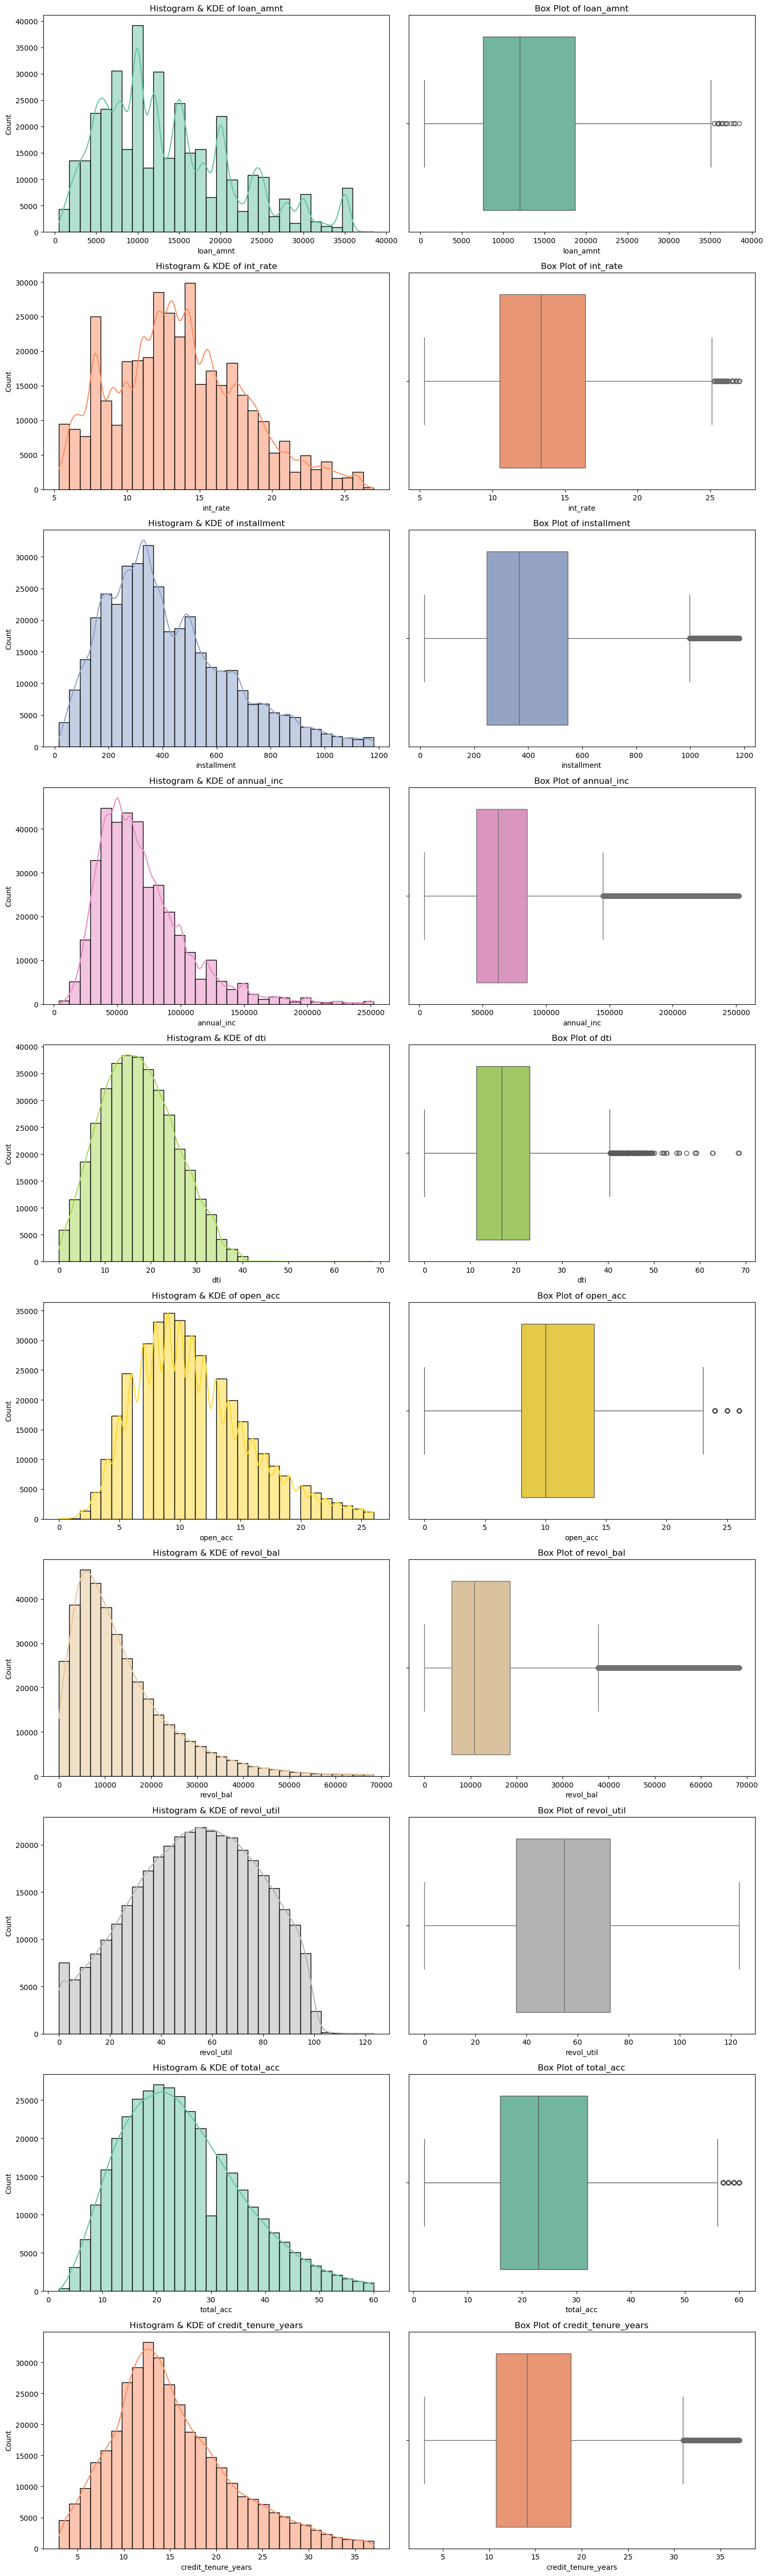

In [88]:
for col in out_cols:
    mean= df[col].mean()
    std= df[col].std()

    upper_limit= mean + 3*std
    lower_limit = mean - 3*std

    df= df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

hist_box_plot(df, out_cols)

In [89]:
print("Rows in the dataset after removing outliers: ", df.shape[0])

Rows in the dataset after removing outliers:  368213


In [90]:
## converting loan term into ints

df['term']= df['term'].str.strip()

df['term']= df['term'].replace({
    '36 months': 36,
    '60 months': 64
})

df['term'].value_counts()

term
36    280708
64     87505
Name: count, dtype: int64

In [91]:
## Assuming verification and source verfied gives same meaning that's why convert them into binary classes

df['verification_status']= df['verification_status'].replace({
    "Verified": 1,
    "Source Verified": 1,
    "Not Verified": 0
})

df['verification_status'].value_counts()

verification_status
1    248550
0    119663
Name: count, dtype: int64

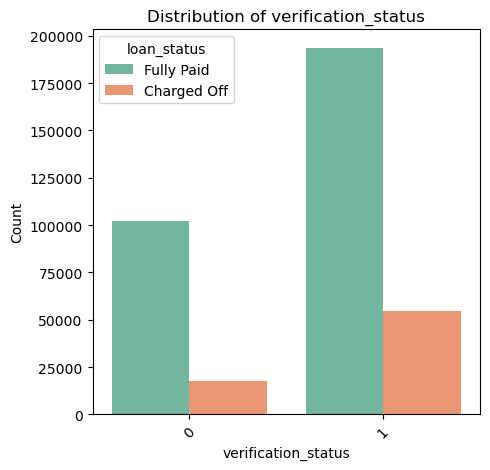

In [92]:
plt.figure(figsize= (5,5))

sns.countplot(x=df['verification_status'], palette="Set2", hue= df['loan_status'])
plt.title('Distribution of verification_status')
plt.xticks(rotation= 45)
plt.xlabel('verification_status')
plt.ylabel('Count')

plt.show()

**There is no much difference in the ratio of fully paid and charged off even we have merged the verified and source verified features**

In [93]:
## target variable

print(df['loan_status'].unique())

df['loan_status']= df['loan_status'].replace({
    'Fully Paid': 1, 
    'Charged Off': 0})


df['loan_status'].value_counts()

['Fully Paid' 'Charged Off']


loan_status
1    295866
0     72347
Name: count, dtype: int64

In [94]:
print(df['initial_list_status'].unique())

df['initial_list_status']= df['initial_list_status'].map({
    'w': 1,
    'f': 0
})

df['initial_list_status'].value_counts()

['w' 'f']


initial_list_status
0    222089
1    146124
Name: count, dtype: int64

In [95]:
print(df.application_type.value_counts())

## In this feature Individual has dominating so we can drop this columns to maintain the balance.

df.drop('application_type', inplace=True, axis= 1)
df.columns

application_type
INDIVIDUAL    367617
JOINT            360
DIRECT_PAY       236
Name: count, dtype: int64


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'emp_length_clean', 'emp_level', 'zip_code', 'state',
       'credit_tenure_years'],
      dtype='object')

In [96]:
df.zip_code.value_counts()

zip_code
70466    52980
30723    52661
22690    52622
48052    52010
00813    42480
29597    42259
05113    42157
11650    10443
93700    10376
86630    10225
Name: count, dtype: int64

### MultiCollinearity and Feature Selection

In [97]:
# check shape of data
# number of rows removed from the dataset

rows_removed= original_data.shape[0] - df.shape[0]
print("Rows removed from the dataset: ", rows_removed)


print(f"The rows remaining in the dataset: {df.shape[0]}")

Row removed from the dataset:  27817
The rows remaining in the dataset: 368213


In [98]:
# number of rows removed from the dataset

rows_removed= original_data.shape[0] - df.shape[0]
print("Row removed from the dataset: ", rows_removed)

Row removed from the dataset:  27817


In [99]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'emp_length_clean', 'emp_level', 'zip_code', 'state',
       'credit_tenure_years'],
      dtype='object')

### Calculating the VIF score to eliminate the features 

#### Storing the dataset in the Local

In [103]:
# training_features = [
#     'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 
#     'home_ownership', 'annual_inc', 'verification_status', 'purpose',
#     'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
#     'total_acc', 'initial_list_status', 'mort_acc', 
#     'pub_rec_bankruptcies', 'emp_level', 'zip_code', 'credit_tenure_years'
# ]

# df[training_features + ['loan_status']].to_csv("dataset_for_model.csv", index= False)

## Load the dataset

In [1]:
# load the dataset
import pandas as pd

data= pd.read_csv("dataset_for_model.csv", index_col= False)
print(f"Shape of the data Rows: {data.shape[0]}, Columns: {data.shape[1]}")
data.head()

Shape of the data Rows: 368213, Columns: 22


,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,dti,...,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,emp_level,zip_code,credit_tenure_years,loan_status
0,10000.0,36,11.44,329.48,B,RENT,117000.0,0,vacation,26.24,...,36369.0,41.8,25.0,1,0.0,0.0,Legend,22690,24.602740,1
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,0,debt_consolidation,22.05,...,20131.0,53.3,27.0,0,1.0,0.0,Mid,5113,10.509589,1
2,15600.0,36,10.49,506.97,B,RENT,43057.0,1,credit_card,12.79,...,11987.0,92.2,26.0,0,0.0,0.0,Fresher,5113,7.424658,1
3,7200.0,36,6.49,220.65,A,RENT,54000.0,0,credit_card,2.60,...,5472.0,21.5,13.0,0,0.0,0.0,Senior,813,8.172603,1
4,24375.0,64,17.27,609.33,C,MORTGAGE,55000.0,1,credit_card,33.95,...,24584.0,69.8,43.0,0,1.0,0.0,Senior,11650,14.095890,0


In [2]:
# converting everything into numerical features through various methods like one hot encoding, label encoding etc.
training_features = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 
    'home_ownership', 'annual_inc', 'verification_status', 'purpose',
    'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
    'total_acc', 'initial_list_status', 'mort_acc', 
    'pub_rec_bankruptcies', 'emp_level', 'zip_code', 'credit_tenure_years'
]

X= data[training_features]
Y= data['loan_status']

print(f"Shape of the data Rows: {X.shape[0]}, Columns: {X.shape[1]}")
X.head()

Shape of the data Rows: 368213, Columns: 21


,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,dti,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,emp_level,zip_code,credit_tenure_years
0,10000.0,36,11.44,329.48,B,RENT,117000.0,0,vacation,26.24,...,0.0,36369.0,41.8,25.0,1,0.0,0.0,Legend,22690,24.602740
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,0,debt_consolidation,22.05,...,0.0,20131.0,53.3,27.0,0,1.0,0.0,Mid,5113,10.509589
2,15600.0,36,10.49,506.97,B,RENT,43057.0,1,credit_card,12.79,...,0.0,11987.0,92.2,26.0,0,0.0,0.0,Fresher,5113,7.424658
3,7200.0,36,6.49,220.65,A,RENT,54000.0,0,credit_card,2.60,...,0.0,5472.0,21.5,13.0,0,0.0,0.0,Senior,813,8.172603
4,24375.0,64,17.27,609.33,C,MORTGAGE,55000.0,1,credit_card,33.95,...,0.0,24584.0,69.8,43.0,0,1.0,0.0,Senior,11650,14.095890


In [3]:
# encoding the categorical features using dummies method or one hot encoder, for now let's use dummies method

dummies= ['grade', 'home_ownership', 'emp_level', 'zip_code', 'purpose']
X = pd.get_dummies(X, columns=dummies, drop_first=True)
print(f"Shape of the data Rows: {X.shape[0]}, Columns: {X.shape[1]}")
X.head()

Shape of the data Rows: 368213, Columns: 52


,loan_amnt,term,int_rate,installment,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,117000.0,0,26.24,16.0,0.0,36369.0,...,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,265.68,65000.0,0,22.05,17.0,0.0,20131.0,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.0,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,54000.0,0,2.60,6.0,0.0,5472.0,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,64,17.27,609.33,55000.0,1,33.95,13.0,0.0,24584.0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
Y.shape

(368213,)

## Build the Classification model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [6]:
# split the data into train and test

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state= 42 )

### Standardizing the data using StandardScaler or MinMaxScaler

**We scale features to bring them to a common range so that no single feature dominates the model due to its magnitude, especially in algorithms sensitive to distance or gradient calculations.**

#### **StandardScaler**: 
* Tranform the data to have mean close to 0, std= 1. Better for the data that is normally distributed.
* formulae= (x - mean)/std
* Affected by the outliers, doesn't cap them, the data distribution will be same as original data.

#### **MinMax Scaler**:
* Scales the data to a fixed range, typically in range [0,1]
* formulae= (x-min)/(max- min)
* Very sensitive to outliers - largely affected by it.

In [70]:
# standardizing the data to same scale

scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

# converting into dataframe using pandas
x_train_scaled= pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_train_scaled.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,-0.104019,1.791146,2.775179,-0.142568,-0.973340,0.694806,2.445487,1.492485,2.408290,-0.307452,...,4.001429,-0.073598,-0.150626,-0.103382,-0.086227,-0.237935,-0.029377,-0.118719,-0.080166,-0.068356
1,-0.837731,-0.558302,-0.126112,-0.779180,-0.889069,0.694806,-1.357405,-0.013613,2.408290,-0.628915,...,-0.249911,-0.073598,-0.150626,-0.103382,-0.086227,-0.237935,-0.029377,-0.118719,-0.080166,-0.068356
2,-0.334886,-0.558302,1.049782,-0.073685,0.065998,0.694806,0.498960,-0.228770,-0.415232,-1.089682,...,-0.249911,-0.073598,-0.150626,-0.103382,-0.086227,-0.237935,-0.029377,-0.118719,-0.080166,-0.068356
3,-1.331088,-0.558302,1.325664,-1.308530,0.065998,-1.439252,-0.690448,-0.013613,-0.415232,-0.357977,...,-0.249911,-0.073598,-0.150626,-0.103382,-0.086227,-0.237935,-0.029377,-0.118719,-0.080166,-0.068356
4,0.022482,1.791146,0.586208,-0.339556,-0.495806,0.694806,0.438440,-1.089397,-0.415232,0.328347,...,-0.249911,-0.073598,-0.150626,-0.103382,-0.086227,-0.237935,-0.029377,-0.118719,-0.080166,-0.068356


In [8]:
# loading the Logistic regression model imported from sklearn

logr= LogisticRegression(max_iter=1000)

logr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [9]:
# get the predicted values
y_pred= logr.predict(x_test_scaled)
y_pred

C:\Users\302sy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [10]:
y_proba = logr.predict_proba(x_test_scaled)[:, 1]  # Probabilities for class 1 (positive class)
y_proba

C:\Users\302sy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([9.99999789e-01, 7.02146246e-01, 9.99999648e-01, ...,
       9.99923164e-01, 8.80942827e-01, 7.84021270e-06])

## Evaluating the model

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [12]:
y_df= pd.Series(y_test)
y_df.value_counts()

loan_status
1    59076
0    14567
Name: count, dtype: int64

In [13]:
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[ 6721  7846]
 [  341 58735]]


#### Extraction from Confusion matrix - These are not final metrics as the dataset is imbalanced
1. True Negatives(TN): 6721 - Correctly predicted charged off applications
2. False Positive(FP): 7846 - Out of 59076 valueable customers, predicted 7846 applicants as fraud or Charged off. 
3. False Negatives(FN): 341 - Out of 14567 charged off application, 341 incorrectly predicted as valueable. (Most important factor for this problem)
4. True Positives(TP): 58735 - Correctly predicted Valueable customers.

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     14567
           1       0.88      0.99      0.93     59076

    accuracy                           0.89     73643
   macro avg       0.92      0.73      0.78     73643
weighted avg       0.90      0.89      0.87     73643



In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8888285376749997
Precision: 0.882158573767291
Recall: 0.9942277743923083
F1 Score: 0.9348464470741781


#### 📌 Insights
---
- Model Bias Toward Class 1 (Valueable Customers):
    - High recall for class 1 (0.99) and poor recall for class 0 (0.46).
    - The model is better at identifying valueable customers.
---

* Business Risk Perspective:
    - Misclassifying class 0 (charging-off customers as good) is risky, but the FN (341) count is very low (2.34%). This is good.
    - However, high FP (7846 valueable customers wrongly predicted as risky) may mean losing good customers, affecting revenue.

---

ROC-AUC Score: 0.9067861678159251


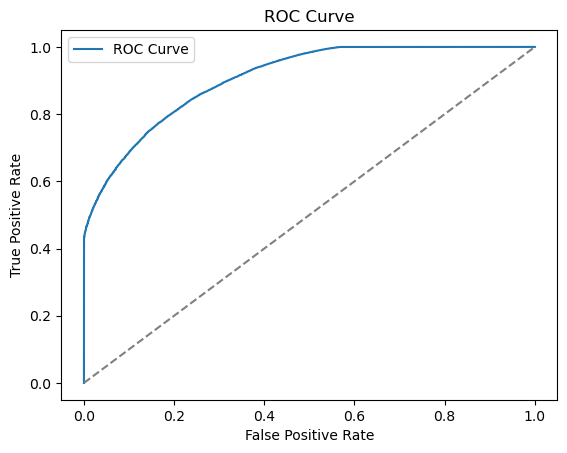

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

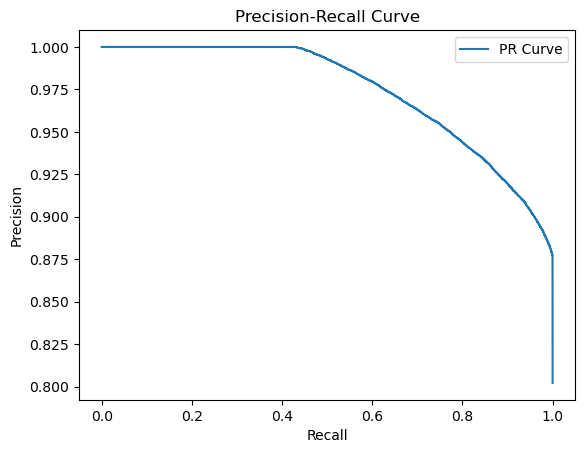

In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, label='PR Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


#### Model Performance Insight

The Logistic Regression model shows signs of performance imbalance, primarily due to the underlying class imbalance in the dataset. While the model performs well in identifying the majority class, it struggles with recall for the minority class, leading to a high number of false negatives.

This suggests that the model is likely biased toward the dominant class, which is a common issue in imbalanced classification problems. Further steps like resampling techniques (SMOTE, undersampling), class weighting,  could be explored to improve the model's ability to detect the minority class more effectively.


### Removing features using variance_inflation_factor

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.astype(float).values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False, ignore_index= True)
    return vif

In [9]:
# x_train_vif= x_train.copy()
# vif_df= calc_vif(x_train_vif)
# vif_df

,Feature,VIF
0,loan_amnt,197.09
1,installment,179.86
2,int_rate,119.90
3,term,75.94
4,purpose_debt_consolidation,31.21
5,purpose_credit_card,11.57
6,grade_D,10.37
7,grade_C,9.44
8,revol_util,8.78
9,total_acc,8.51


In [10]:
# while vif_df.iloc[0]['VIF'] > 5:
#     feature_to_remove = vif_df.iloc[0]['Feature']
#     print(f"Removing feature: {feature_to_remove} (VIF: {vif_df.iloc[0]['VIF']})")
#     x_train_vif= x_train_vif.drop(columns= feature_to_remove)
#     vif_df= calc_vif(x_train_vif)
#     print('-'*50)
#     print(vif_df[:5])
#     print('-'*50)
# vif_df

Removing feature: loan_amnt (VIF: 197.09)
--------------------------------------------------
                      Feature     VIF
0                    int_rate  101.67
1  purpose_debt_consolidation   28.08
2                        term   18.84
3         purpose_credit_card   10.47
4                     grade_D   10.01
--------------------------------------------------
Removing feature: int_rate (VIF: 101.67)
--------------------------------------------------
                      Feature    VIF
0  purpose_debt_consolidation  23.13
1                        term  18.29
2         purpose_credit_card   8.75
3                   total_acc   8.47
4                  revol_util   8.39
--------------------------------------------------
Removing feature: purpose_debt_consolidation (VIF: 23.13)
--------------------------------------------------
               Feature    VIF
0                 term  16.35
1            total_acc   8.36
2  credit_tenure_years   8.10
3           annual_inc   7.94
4   

,Feature,VIF
0,pub_rec,4.92
1,pub_rec_bankruptcies,4.71
2,mort_acc,3.25
3,verification_status,3.24
4,revol_bal,2.84
5,emp_level_Legend,2.81
6,home_ownership_RENT,2.56
7,grade_B,2.51
8,grade_C,2.46
9,emp_level_Mid,2.08


In [12]:
x_train_vif

,verification_status,pub_rec,revol_bal,initial_list_status,mort_acc,pub_rec_bankruptcies,grade_B,grade_C,grade_D,grade_E,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
170105,1,1.0,10406.0,1,1.0,0.0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4086,1,1.0,6843.0,1,0.0,0.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
68424,1,0.0,1736.0,0,1.0,0.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
348465,0,0.0,9846.0,1,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
79263,1,0.0,17453.0,1,1.0,0.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1,0.0,20240.0,1,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
365838,1,0.0,13007.0,0,1.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131932,1,0.0,4243.0,0,0.0,0.0,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
146867,1,0.0,2803.0,0,0.0,0.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# store the vif data into the local so that, no need to run again and again
# x_train_vif.to_csv('x_trained_vif.csv')

## Load the data for x_train 

x_train_vif= pd.read_csv('x_trained_vif.csv', index_col=0)
x_test_vif= x_test[x_train_vif.columns]

#### Standardizing the data

In [24]:
scaler= StandardScaler()
x_train_vif_scaled= scaler.fit_transform(x_train_vif)
x_test_vif_scaled= scaler.transform(x_test_vif)

# converting into dataframe using pandas
x_train_scaled_df= pd.DataFrame(x_train_vif_scaled, columns= x_train_vif.columns)
x_train_scaled_df.head()

,verification_status,pub_rec,revol_bal,initial_list_status,mort_acc,pub_rec_bankruptcies,grade_B,grade_C,grade_D,grade_E,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.694806,2.408290,-0.307452,1.233520,0.923228,-0.361645,-0.649715,-0.603782,-0.436374,-0.292623,...,4.001429,-0.073598,-0.150626,-0.103382,-0.086227,-0.237935,-0.029377,-0.118719,-0.080166,-0.068356
1,0.694806,2.408290,-0.628915,1.233520,-1.083156,-0.361645,1.539136,-0.603782,-0.436374,-0.292623,...,-0.249911,-0.073598,-0.150626,-0.103382,-0.086227,-0.237935,-0.029377,-0.118719,-0.080166,-0.068356
2,0.694806,-0.415232,-1.089682,-0.810688,0.923228,-0.361645,-0.649715,-0.603782,-0.436374,3.417368,...,-0.249911,-0.073598,-0.150626,-0.103382,-0.086227,-0.237935,-0.029377,-0.118719,-0.080166,-0.068356
3,-1.439252,-0.415232,-0.357977,1.233520,-1.083156,-0.361645,-0.649715,-0.603782,2.291612,-0.292623,...,-0.249911,-0.073598,-0.150626,-0.103382,-0.086227,-0.237935,-0.029377,-0.118719,-0.080166,-0.068356
4,0.694806,-0.415232,0.328347,1.233520,0.923228,-0.361645,-0.649715,1.656228,-0.436374,-0.292623,...,-0.249911,-0.073598,-0.150626,-0.103382,-0.086227,-0.237935,-0.029377,-0.118719,-0.080166,-0.068356


#### Undersampling vs Oversampling

When dealing with class imbalance, both undersampling and oversampling aim to balance the dataset, but approach it differently:

- **Undersampling**: Reduces the number of majority class samples to match the minority class.  
  -  Faster training  
  -  Risk of losing valuable information  
  -  Useful when data is abundant and imbalance is extreme

- **Oversampling**: Increases minority class samples (e.g., using SMOTE) to match the majority class size.  
  -  Preserves all original data  
  -  Increases risk of overfitting on synthetic samples  
  -  Effective when minority class is small and valuable

> In this case, given the high class imbalance **oversampling with techniques like SMOTE** is likely to be more effective for improving recall without discarding data.


In [25]:
print(f"if undersample the size of the dataset would be {len(y_train[y_train==0])*2}, No of records removed; {len(y_train) - len(y_train[y_train==0])}")
print(f"if Oversampleing is done then the size of dataset would be {len(y_train[y_train== 1])*2}, No of sythetic data created: {len(y_train[y_train==1]) - len(y_train[y_train == 0])}")

y_train.value_counts()

if undersample the size of the dataset would be 115560, No of records removed; 236790
if Oversampleing is done then the size of dataset would be 473580, No of sythetic data created: 179010


loan_status
1    236790
0     57780
Name: count, dtype: int64

In [23]:
len(y_train[y_train== 1])

236790

In [27]:
minority_count = len(y_train[y_train == 0])
majority_count = len(y_train[y_train == 1])

# Undersampling
print(f"If undersampling is applied: dataset size = {minority_count * 2}, records removed = {len(y_train) - minority_count * 2}")

# Oversampling
print(f"If oversampling is applied: dataset size = {majority_count * 2}, synthetic records created = {majority_count - minority_count}")

# Current class distribution
print("\nCurrent class distribution:")
print(y_train.value_counts())


If undersampling is applied: dataset size = 115560, records removed = 179010
If oversampling is applied: dataset size = 473580, synthetic records created = 179010

Current class distribution:
loan_status
1    236790
0     57780
Name: count, dtype: int64


#### Is SMOTE a Good Idea Here?
- In this case: No, using plain SMOTE is not ideal when:
- You're generating 6x+ more synthetic samples than actual ones
- This can lead to overfitting, poor generalization, and synthetic noise
- SMOTE works best when you're slightly boosting the minority class — not when bridging a huge gap

#### Class Weights
* Class weights gives more importance to the `minority class` during model training,it doesn't change the dataset size(no undersampling or oversampling)
* Instead of balancing dataset, it balances the loss function. 

In [25]:
# logistic regression model using class weights
class_weight= {0 : 1, 1: 4 }

lgr_model2= LogisticRegression(class_weight= class_weight, max_iter= 1000) 
lgr_model2.fit(x_train_vif_scaled, y_train)

LogisticRegression(class_weight={0: 1, 1: 4}, max_iter=1000)

### Iterations and modifications
1. Used classweight= 'balanced', max_iter= 100 - same results

In [26]:
y_pred2= lgr_model2.predict(x_test_vif_scaled)

In [27]:
cm2= confusion_matrix(y_test, y_pred2)
print(cm2)

[[ 6281  8286]
 [    0 59076]]


In [29]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     14567
           1       0.88      1.00      0.93     59076

    accuracy                           0.89     73643
   macro avg       0.94      0.72      0.77     73643
weighted avg       0.90      0.89      0.87     73643



#### Undersampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train_vif_scaled, y_train)

C:\Users\302sy\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\302sy\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\302sy\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [32]:
from collections import Counter

print(sorted(Counter(y_train_undersampled).items()))


[(0, 57780), (1, 57780)]


In [61]:
lgr_model3= LogisticRegression(class_weight='balanced',max_iter=1000) 
lgr_model3.fit(x_train_undersampled, y_train_undersampled)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [62]:
y_pred3= lgr_model3.predict(x_test_vif_scaled)

In [63]:
cm3= confusion_matrix(y_test, y_pred3)
print(cm3)

[[11903  2664]
 [13130 45946]]


In [64]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.48      0.82      0.60     14567
           1       0.95      0.78      0.85     59076

    accuracy                           0.79     73643
   macro avg       0.71      0.80      0.73     73643
weighted avg       0.85      0.79      0.80     73643



In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))`
print("Recall:", recall_score(y_test, y_pred3))
print("F1 Score:", f1_score(y_test, y_pred3))

Accuracy: 0.7855329087625437
Precision: 0.9451964616334088
Recall: 0.7777439230821315
F1 Score: 0.8533328380662296


ROC-AUC Score: 0.9016759209652032


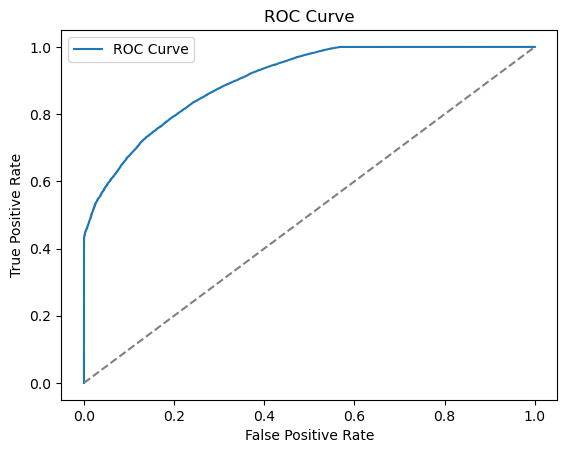

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_proba3= lgr_model3.predict_proba(x_test_vif_scaled)[:, 1]  # Probabilities for class 1 (positive class)


# AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba3))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba3)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

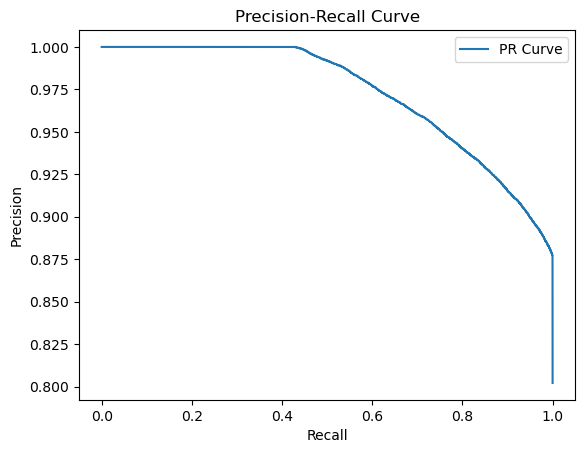

In [69]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba3)
plt.plot(recall, precision, label='PR Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


## Project Conclusion and Insights

### Model Performance Summary
- The model achieved an overall **accuracy of 79%** on the test data.
- **Class 0 (minority class)** has a lower precision (0.48) but a relatively high recall (0.82), indicating the model captures most of the minority class but includes some false positives.
- **Class 1 (majority class)** is predicted with high precision (0.95) and good recall (0.78), showing the model performs well on the dominant class.

### Key Insights
- The model performs reasonably well on both classes despite class imbalance.
- Undersampling or class weighting improved minority class recall significantly.
- However, the precision for Class 0 is still low, which may lead to some over-flagging of defaults.

### Actions and Recommendations
- Review the impact of false positives (Class 0 predicted as default) in a business context to assess risk.
- Further fine-tune the threshold or use probabilistic outputs to improve decision-making.
- For production use, monitor the model over time and retrain with updated data periodically to maintain performance.
- Consider additional features or business rules to support classification, especially for borderline cases.